# SD212: Graph mining
## Lab 4: Hierarchical clustering

In this lab, you will learn to analyse the hierarchical structure of a graph. 

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from scipy import sparse

In [3]:
from sknetwork.data import load_netset, karate_club
from sknetwork.hierarchy import LouvainIteration, Paris, cut_straight, aggregate_dendrogram
from sknetwork.ranking import PageRank
from sknetwork.visualization import svg_graph, svg_dendrogram

## Data

We will work on the following graphs (see the [NetSet](https://netset.telecom-paristech.fr/) collection for details):
* Openflights (graph)
* WikiVitals (directed graph)

In [4]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')

Parsing files...
Done.
Parsing files...
Done.


## 1. Graphs

## Karate Club


We first consider the [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club), a small graph with ground-truth clusters.

In [5]:
dataset = karate_club(True)

In [6]:
adjacency = dataset.adjacency
position = dataset.position
labels_true = dataset.labels

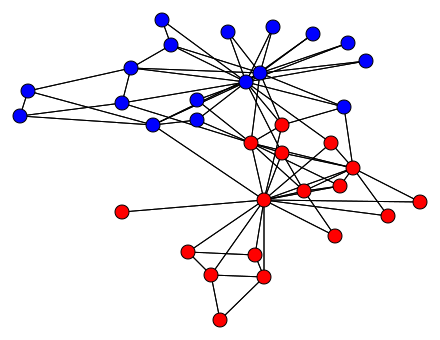

In [7]:
image = svg_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Cluster the graph by the hierarchical Louvain algorithm.
* Display the dendrogram.
* How many clusters are there at depth 1?
* Display the graph with the corresponding clustering.
* How many clusters are there at depth 2?

In [8]:
louvain = LouvainIteration()

In [9]:
dendrogram = louvain.fit_predict(adjacency)
dendrogram

array([[ 9.,  7.,  0.,  2.],
       [13., 12.,  0.,  2.],
       [19., 11.,  0.,  2.],
       [21., 17.,  0.,  2.],
       [25., 23.,  0.,  2.],
       [27., 24.,  0.,  2.],
       [34.,  2.,  0.,  3.],
       [35.,  3.,  0.,  3.],
       [36.,  0.,  0.,  3.],
       [37.,  1.,  0.,  3.],
       [10.,  4.,  1.,  2.],
       [16.,  6.,  1.,  2.],
       [29., 26.,  1.,  2.],
       [30.,  8.,  1.,  2.],
       [31., 28.,  1.,  2.],
       [33., 32.,  1.,  2.],
       [41., 40.,  1.,  6.],
       [43., 42.,  1.,  6.],
       [49., 22.,  1.,  3.],
       [52., 20.,  1.,  4.],
       [53., 18.,  1.,  5.],
       [54., 15.,  1.,  6.],
       [55., 14.,  1.,  7.],
       [39., 38.,  1.,  4.],
       [45.,  5.,  1.,  3.],
       [51., 50.,  2., 12.],
       [46., 47.,  2.,  4.],
       [60., 56.,  2.,  5.],
       [48., 57.,  2.,  6.],
       [44., 58.,  2.,  5.],
       [63., 62.,  3., 11.],
       [64., 61.,  3., 12.],
       [65., 59.,  3., 13.]])

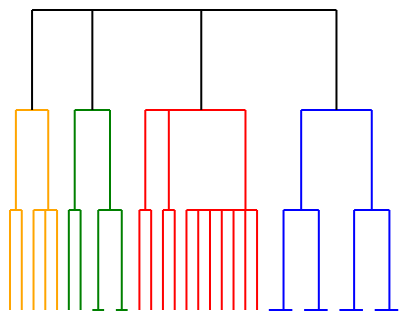

In [10]:
image = svg_dendrogram(dendrogram)
SVG(image)

At depth 1 there is 4 clusters.


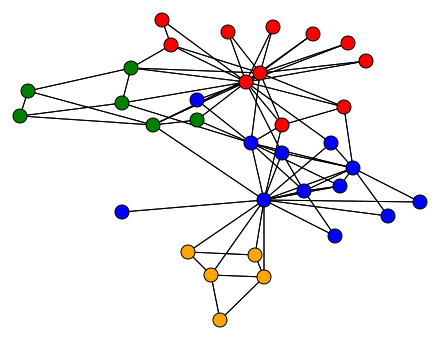

In [11]:
labels_louvain_1 = cut_straight(dendrogram, n_clusters=2)
clusterDepth1 = len(np.unique(labels_louvain_1))
print("At depth 1 there is", clusterDepth1, "clusters.")

image = svg_graph(adjacency, position, labels=labels_louvain_1)
SVG(image)

At depth 2 there is 9 clusters.


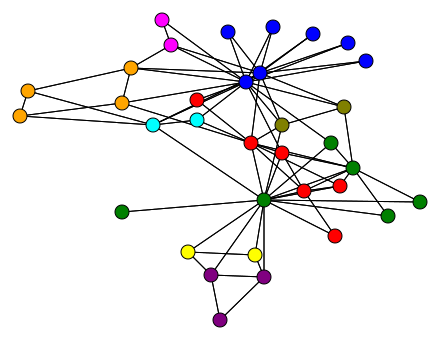

In [12]:
labels_louvain_2 = cut_straight(dendrogram, n_clusters=clusterDepth1 +1)
clusterDepth2 = len(np.unique(labels_louvain_2))
print("At depth 2 there is", clusterDepth2, "clusters.")

image = svg_graph(adjacency, position, labels=labels_louvain_2)
SVG(image)


## To do

* Cluster the graph by the Paris algorithm.
* Display the dendrogram.
* Display the graph with the top-2 clusters. Compare this clustering to the ground-truth labels.
* Display the graph with the top-4 clusters. Compare this clustering with that given by Louvain. 
* Display the corresponding aggregate dendrogram. **Hint:** Check the parameters of the function ``cut_straight``

In [13]:
paris = Paris()

In [14]:
dendrogram = paris.fit_predict(adjacency)

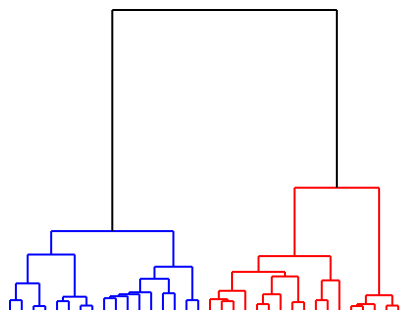

In [15]:
image = svg_dendrogram(dendrogram)
display(SVG(image))

Top 2 clusters of Paris clustering


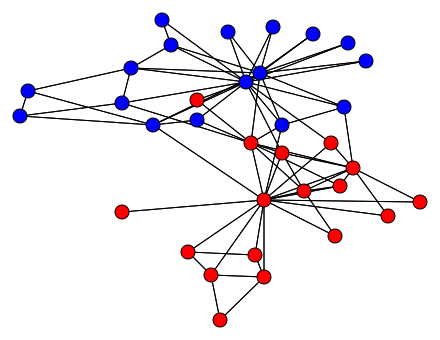

Ground truth labels


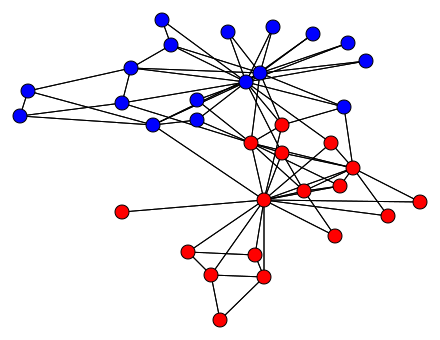

In [16]:
labels_paris_1 = cut_straight(dendrogram, n_clusters=2)
# Plot the hierarchical clustering
image = svg_graph(adjacency, position, labels=labels_paris_1)
# Set title to the image
print("Top 2 clusters of Paris clustering")
display(SVG(image))

# Compare to the ground truth labels
image = svg_graph(adjacency, position, labels=labels_true)
print("Ground truth labels")
display(SVG(image))

The clustering is different.

Top 4 clusters of Paris clustering


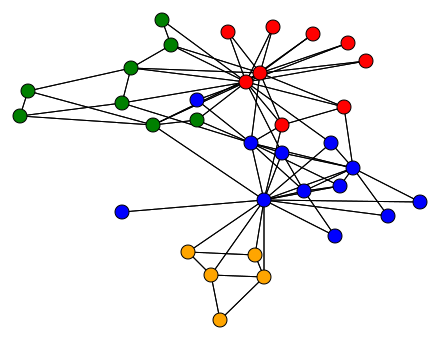

Top 2 clusters of LouvainIteration algorithm


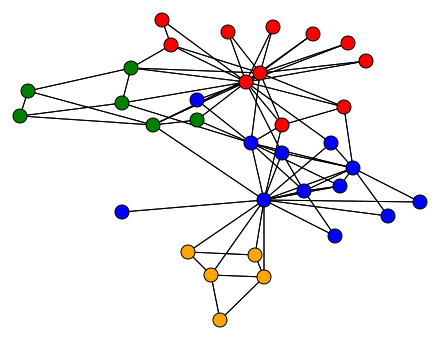

In [17]:

labels_paris_4 = cut_straight(dendrogram, n_clusters=4)

image = svg_graph(adjacency, position, labels=labels_paris_4)
print("Top 4 clusters of Paris clustering")
display(SVG(image))

# Compare to the LouvainIteration algorithm
image = svg_graph(adjacency, position, labels=labels_louvain_1)
print("Top 2 clusters of LouvainIteration algorithm")
display(SVG(image))


The top-4 clusters of Paris Algorithm is the same of the LouvainIteration top-4 clusters.

[[ 2.          1.          1.02564106 17.        ]
 [ 0.          3.          1.5897436  17.        ]
 [ 4.          5.          3.89999978 34.        ]] [0 0 0 0 3 3 3 0 1 0 3 0 0 0 1 1 3 0 1 0 1 0 1 2 2 2 2 2 2 2 1 2 1 1]


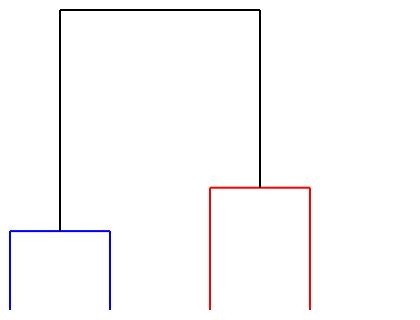

In [18]:
# Display the corresponding aggregate dendrogram. **Hint:** Check the parameters of the function ``cut_straight``
labels, dendrogram_aggregate = cut_straight(dendrogram, n_clusters=4, return_dendrogram=True)

print(dendrogram_aggregate, labels)

image = svg_dendrogram(dendrogram_aggregate)
display(SVG(image))

# Display the aggregate graph


## Openflights


In [19]:
dataset = openflights

In [20]:
adjacency = dataset.adjacency
position = dataset.position
names = dataset.names

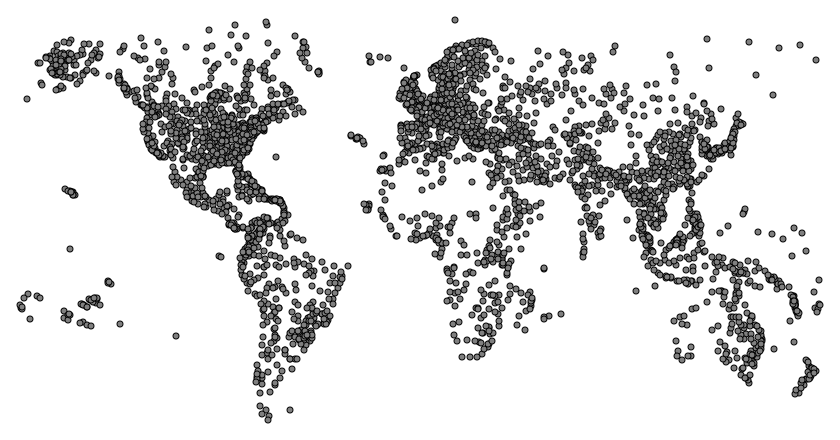

In [21]:
image = svg_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the top-10 clusters found by Paris.
* Display the aggregate dendrogram formed by the top-40 clusters found by Paris, with the name of the top airport  (in traffic) of each cluster. <br>**Hint:** Check the parameters of the function ``svg_dendrogram`` for better visualization.

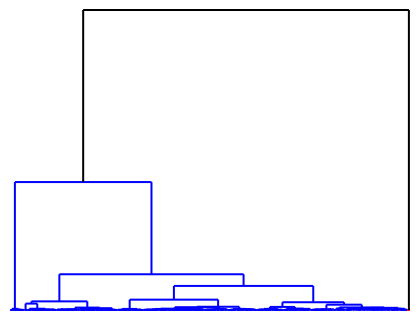

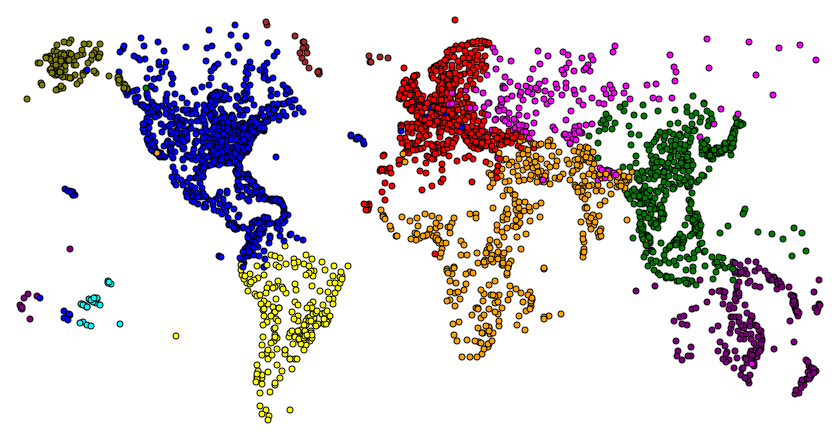

In [22]:
paris = Paris()

dendrogram = paris.fit_predict(adjacency)

image = svg_dendrogram(dendrogram)
display(SVG(image))

labels = cut_straight(dendrogram, n_clusters=10)

image = svg_graph(adjacency, position, labels=labels, width=800, height=400, node_size=3, display_edges=False)
display(SVG(image))

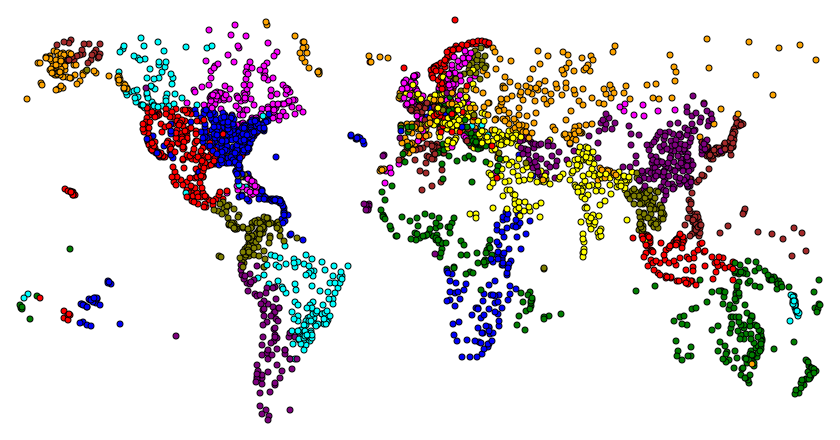

[ 5 10 18 ...  2  3  1]
Top airports of each cluster
[1782, 1773, 1615, 1986, 1618, 999, 124, 1726, 1171, 1914, 379, 1579, 622, 1833, 1295, 286, 238, 1890, 112, 623, 251, 313, 564, 572, 982, 762, 366, 750, 919, 1858, 2019, 194, 253, 7, 192, 240, 1632, 189, 183, 280]


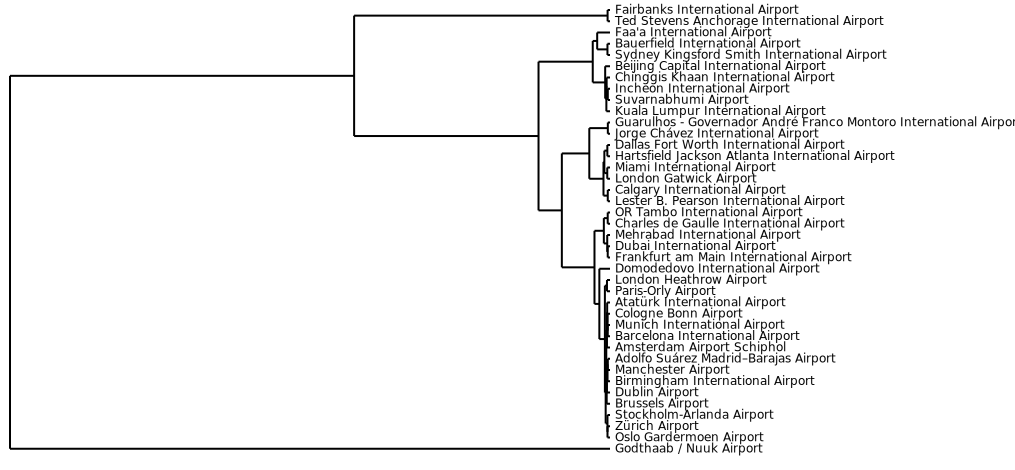

In [27]:
# Display the aggregate dendrogram formed by the top-40 clusters found by Paris, with the name of the top airport  (in traffic) of each cluster. 

n_clusters = 40

# Compute the aggregate graph
labels, dendrogram_aggregate = cut_straight(dendrogram, n_clusters=n_clusters, return_dendrogram=True)

image = svg_graph(adjacency, position, labels=labels, width=800, height=400, node_size=3, display_edges=False)
display(SVG(image))

# Compute the top airport of each cluster with labels and dendrogram
degree = np.sum(adjacency, axis=0)
degree = np.ravel(degree)
print(degree)
weights = adjacency.dot(np.ones(adjacency.shape[0]))
top_airports = []
for i in range(n_clusters):
    cluster = np.flatnonzero(labels == i)
    top_airports.append(cluster[np.argmax(weights[cluster])])

# Display the dendrogram with the name of the top airports of each cluster
print("Top airports of each cluster")
print(top_airports)
image = svg_dendrogram(dendrogram_aggregate, names=names[top_airports], rotate=True, scale=1.5, n_clusters=n_clusters)
display(SVG(image))

## 2. Directed graphs

## Wikipedia Vitals

In [70]:
dataset = wikivitals

In [80]:
adjacency = dataset.adjacency
names = dataset.names

## To do

* Cluster the graph by the Paris algorithm.
* Give the size and top-5 articles of each of the top-40 clusters found by Paris.
* Display the aggregate dendrogram formed by the top-40 clusters, with the name of the top article of each cluster (in terms of Personalized PageRank).

**Hint:** Use Personalized PageRank to get the top article(s) of a cluster.

## To do

* Complete the following function that returns the nested clusters from a target node in a dendrogram.
* Give the size and top-5 articles of each nested cluster from the article **Riverboat**.

In [96]:
def get_cluster_nested(dendrogram: np.ndarray, node: int): 
    '''Get the nested clusters of a node, following the path from the corresponding leaf to the root in the dendrogram.
    
    Parameters
    ----------
    dendrogram: 
        Dendrogram
    node:
        Target node
        
    Returns
    -------
    cluster_nested: list of list
        Nested clusters, as a partition of the set of nodes. 
        
    Example
    -------
    >>> dendrogram = np.array([[0, 1, 1, 2], [2, 3, 1, 2], [4, 5, 1, 4]])
    >>> get_cluster_nested(dendrogram, 0)
    [[0], [1], [2, 3]]
    '''
    n = dendrogram.shape[0] + 1
    
    cluster = {i: [i] for i in range(n)}
    cluster_nested = [[node]]
    cluster_index = node
    
    for t in range(n-1):
        i = int(dendrogram[t][0])
        j = int(dendrogram[t][1])
        cluster[n + t] = cluster[i] + cluster[j]
        if i == cluster_index:
            cluster_nested.append(cluster[j])
            cluster_index = n + t
        elif j == cluster_index:
            cluster_nested.append(cluster[i])
            cluster_index = n + t
    
    return cluster_nested

In [98]:
# Give the size and top-5 articles of each nested cluster from the article Riverboat.

# Compute the Paris dendrogram
paris = Paris()
dendrogram = paris.fit_predict(adjacency)

# Get the index of the article Riverboat
index = 7696

# Get the nested clusters of the article Riverboat
cluster_nested = get_cluster_nested(dendrogram, index)

# Compute the size of each nested cluster
cluster_size = [len(cluster) for cluster in cluster_nested]

# Compute the top-5 articles of each nested cluster
cluster_top5 = []
for cluster in cluster_nested:
    # Get the degree of each article in the cluster
    degree = np.sum(adjacency[cluster, :], axis=0)
    # Sort the articles by decreasing degree
    cluster_top5.append(np.argsort(degree)[::-1][:5])

# Display the results
for i in range(len(cluster_nested)):
    print("Cluster", i, ":", cluster_size[i], "articles")
    for j in range(len(cluster_top5[i])):
        print("  ", j + 1, ":", names[cluster_top5[i][j]])


Cluster 0 : 1 articles
   1 : [['0' 'Orgasm' 'Orhan Pamuk' ... 'Kazan' 'Fishing vessel' 'United States']]
Cluster 1 : 1 articles
   1 : [['0' 'Organosulfur compounds' 'Orgasm' ... 'Ship' 'Panama'
  'Rail transport']]
Cluster 2 : 2 articles
   1 : [['0' 'Organosulfur compounds' 'Orgasm' ... 'Tanker (ship)' 'Barge'
  'Riverboat']]
Cluster 3 : 1 articles
   1 : [['0' 'Orhan Pamuk' 'Oriental Orthodox Churches' ... 'Ship'
  'International trade' 'Infrastructure']]
Cluster 4 : 1 articles
   1 : [['0' 'Organon' 'Organophosphorus compound' ... 'Crane (machine)'
  'Indonesia' 'Code of Hammurabi']]
Cluster 5 : 1 articles
   1 : [['0' 'Organization for Security and Co-operation in Europe'
  'Organization of American States' ... 'Aquaculture'
  'Great Pyramid of Giza' 'Seafood']]
Cluster 6 : 1 articles
   1 : [['0' 'Organosilicon' 'Organosulfur compounds' ... 'Germany' 'Riverboat'
  'Ferry']]
Cluster 7 : 1 articles
   1 : [['0' 'Organic farming' 'Organism' ... 'Corsica' 'Train station'
  'Buenos A

# Quiz

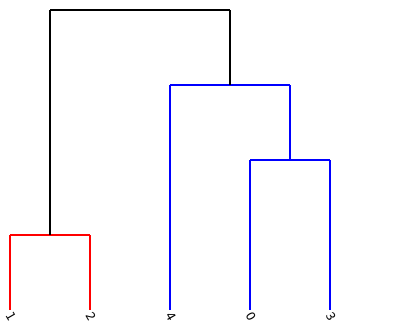

[[0], [3], [4], [1, 2]]


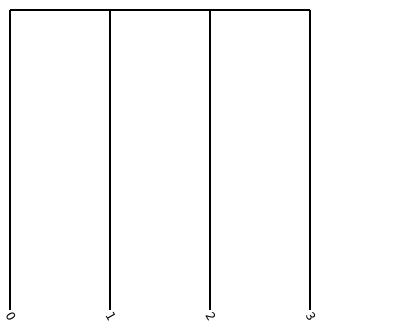

[[0], [1], [2, 3]]


In [97]:
dendrogram = np.array([
    [1, 2, 1, 2],
    [0, 3, 2, 2],
    [4, 6, 3, 3],
    [5, 7, 4, 5]
])

labels = np.array([0,1,2,3,4])

image = svg_dendrogram(dendrogram, names=labels)
display(SVG(image))

print(get_cluster_nested(dendrogram, 0))

dendrogram = np.array([[0, 1, 1, 2], [2, 3, 1, 2], [4, 5, 1, 4]])
image = svg_dendrogram(dendrogram, names=np.array([0,1,2,3]))
display(SVG(image))
print(get_cluster_nested(dendrogram, 0))

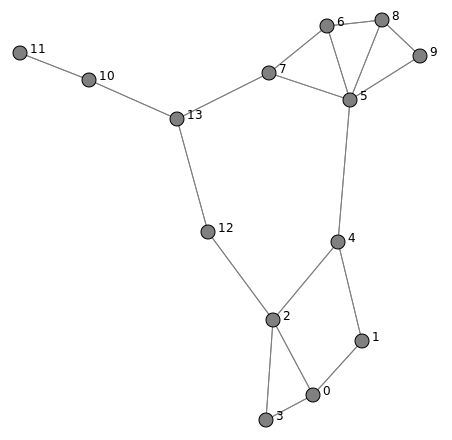

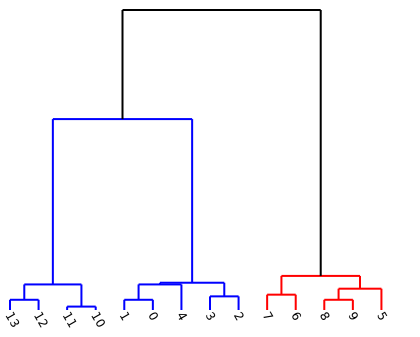

Merged pairs
[[11.         10.          0.05263158  2.        ]
 [ 1.          0.          0.15789473  2.        ]
 [ 8.          9.          0.15789473  2.        ]
 [13.         12.          0.15789473  2.        ]
 [ 3.          2.          0.21052632  2.        ]
 [ 7.          6.          0.2368421   2.        ]
 [16.          5.          0.3289474   3.        ]
 [15.          4.          0.39473685  3.        ]
 [17.         14.          0.39473685  4.        ]
 [21.         18.          0.42105263  5.        ]
 [19.         20.          0.5263158   5.        ]
 [22.         23.          2.94736827  9.        ]
 [25.         24.          4.63157889 14.        ]]


In [99]:
# import csr_matrix
import scipy.sparse

neighbors = [
    [2, 3, 1],
    [0, 4],
    [0,3,4,12],
    [0,2],
    [1,2,5],
    [6,7,8,9,4],
    [5,7,8],
    [5,6,13],
    [5,6,9],
    [5,8],
    [11,13],
    [10],
    [2,13],
    [7,10,12]
]

adjacency = np.zeros((len(neighbors), len(neighbors)), dtype=int)
for i in range(len(neighbors)):
    for j in neighbors[i]:
        adjacency[i, j] = 1

# convert adjacency to sparse
adjacency = scipy.sparse.csr_matrix(adjacency)

names = np.array(range(len(neighbors)))

image = svg_graph(adjacency, width=400, height=400, names=names)
display(SVG(image))

# pair of nodes is merged first by the Paris algorithm?
paris = Paris()
dendrogram = paris.fit_predict(adjacency)
# display the dendrogram
image = svg_dendrogram(dendrogram, names=names)
display(SVG(image))
# display the merged pairs
print("Merged pairs")
print(dendrogram)

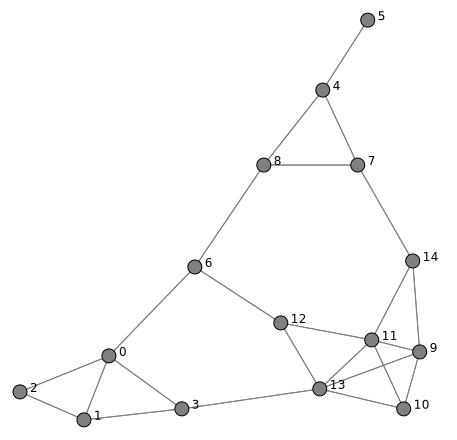

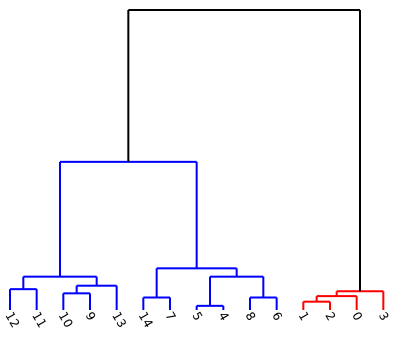

Merged pairs
[[ 5.          4.          0.0625      2.        ]
 [ 1.          2.          0.125       2.        ]
 [ 8.          6.          0.18749999  2.        ]
 [14.          7.          0.18749999  2.        ]
 [16.          0.          0.20833335  3.        ]
 [10.          9.          0.25        2.        ]
 [19.          3.          0.28125     4.        ]
 [12.         11.          0.3125      2.        ]
 [20.         13.          0.36458332  3.        ]
 [15.         17.          0.5         4.        ]
 [22.         23.          0.5         5.        ]
 [18.         24.          0.62499999  6.        ]
 [25.         26.          2.22222228 11.        ]
 [27.         21.          4.49999997 15.        ]]


In [100]:
neighbors = [
    [1,2,3,6],
    [0,2,3],
    [0,1],
    [0,1,13],
    [5,7,8],
    [4],
    [0,8,12],
    [4,8,14],
    [4,6,7],
    [10,11,13,14],
    [9,11,13],
    [9,10,12,13,14],
    [6,11,13],
    [9,10,11,12,3],
    [7,9,11]    
]

adjacency = np.zeros((len(neighbors), len(neighbors)), dtype=int)
for i in range(len(neighbors)):
    for j in neighbors[i]:
        adjacency[i, j] = 1

# convert adjacency to sparse
adjacency = scipy.sparse.csr_matrix(adjacency)

names = np.array(range(len(neighbors)))

image = svg_graph(adjacency, width=400, height=400, names=names)
display(SVG(image))

# pair of nodes is merged first by the Paris algorithm?
paris = Paris()
dendrogram = paris.fit_predict(adjacency)
# display the dendrogram
image = svg_dendrogram(dendrogram, names=names)
display(SVG(image))
# display the merged pairs
print("Merged pairs")
print(dendrogram)

In [111]:
print(adjacency.sum()/(adjacency.sum(axis=0)[0,4]*adjacency.sum(axis=0)[0,5]))

16.0


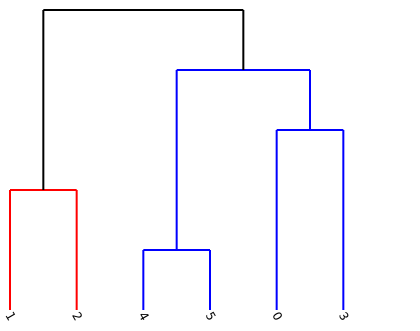

In [10]:
dendrogram = np.array([
    [4, 5, 1, 2],
    [1, 2, 2, 2],
    [0, 3, 3, 2],
    [6, 8, 4, 4],
    [7, 9, 5, 6],
])

labels = np.array([0,1,2,3,4,5])

image = svg_dendrogram(dendrogram, names=labels)
display(SVG(image))
